# Assignment 10 - Bonus assignments

## Part 1 - Introduction to Deep learning

Even though Sklearn has some neural network tools built-in, the most common Python libraries for deep learning and neural networks is Keras, Tensorflow or Pytorch. In this task, we will create a neural network using Keras. 

We will keep the same typ of network as in **Assignment 5**, a Multi Layer Perceptron.

### 1. Required libraries

These are the required libraries. You will have to install Keras and Tensorflow by running `pip install keras` and `pip install tensorflow`. 

You can create a separate Anaconda environment on your computer specific for this assignemnt, this is not required but can speed up the installation and development. Red more on how to create an environment here: [Manage Anaconda Environments](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)

In [ ]:
# Import required libraries
from tensorflow.keras.utils import to_categorical  # Using TensorFlow's Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# 1. Required Libraries
# Keras and TensorFlow are required for creating and training neural networks
# If not already installed, run:
# pip install keras tensorflow

# 2. Starter Functions for Plotting
# This function will reshape and plot an image from a pixel value array
def plot_image(num_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, num_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

# Function for displaying a confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center', verticalalignment='center')

# 3. Loading the Data
# Load the MNIST dataset (adjust paths if needed)
train_data = pd.read_csv('C:\\Users\\nayif\\py3b_nayef_omer\\week10\\A5_mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\nayif\\py3b_nayef_omer\\week10\\A5_fashion-mnist_train.csv')

# Check the first few rows of the training data
print(train_data.head())

# 4. Split data into features (X) and labels (y)
X_train = train_data.iloc[:, 1:].values  # All rows, all columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # All rows, just the first column (labels)

X_test = test_data.iloc[:, 1:].values    # Same for the test data
y_test = test_data.iloc[:, 0].values

# 5. Preprocess Data
# Normalize data (scale to [0, 1] by dividing by 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 6. One-hot encode the labels (turn labels into a 10-class one-hot array)
y_train = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test = to_categorical(y_test, 10)

# 7. Create the Neural Network Model (MLP)
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout to avoid overfitting

# Add second hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# 8. Compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# 9. Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 10. Evaluate the model
# Test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

# 11. Make predictions
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 12. Classification report and accuracy score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

# 13. Confusion matrix
create_confusion_matrix(y_true, y_pred_classes, 10)

# 14. Visualize some random predictions
for _ in range(8):  # Display 8 random predictions
    random_index = random.randint(0, X_test.shape[0] - 1)
    true_label = y_true[random_index]
    pred_label = y_pred_classes[random_index]
    
    # Plot the image
    plot_image(8, _ + 1, X_test[random_index, :], 28, 
               f'True: {true_label}, Pred: {pred_label}', 
               colors="Greens" if true_label == pred_label else "Reds")

plt.show()



### 2. Starter functions

Here are two functions from **Assignment 5** that might be useful for you. 

First is the function for showing an array of pixel values as an image using `matplotlib`:

In [ ]:
# This function will reshape and plot an image from a pixel value array
def plot_image(num_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, n_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

Then there is the function for displaying a confusion matrix:

In [ ]:
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(
                str(cm[x][y]), xy=(y, x), 
                horizontalalignment='center',
                verticalalignment='center'
            )

### 3. Loading the data

Load the data in the same way as in **Assignment 5** by using `pd.read_csv()` to read the values from both the training dataset and the test dataset.

In [ ]:
# Import required libraries
from tensorflow.keras.utils import to_categorical  # Using TensorFlow's Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# 1. Required Libraries
# Keras and TensorFlow are required for creating and training neural networks
# If not already installed, run:
# pip install keras tensorflow

# 2. Starter Functions for Plotting
# This function will reshape and plot an image from a pixel value array
def plot_image(num_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, num_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

# Function for displaying a confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center', verticalalignment='center')

# 3. Loading the Data
# Load the MNIST dataset (adjust paths if needed)
train_data = pd.read_csv('C:\\Users\\nayif\\py3b_nayef_omer\\week10\\A5_mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\nayif\\py3b_nayef_omer\\week10\\A5_fashion-mnist_train.csv')

# Check the first few rows of the training data
print(train_data.head())

# 4. Split data into features (X) and labels (y)
X_train = train_data.iloc[:, 1:].values  # All rows, all columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # All rows, just the first column (labels)

X_test = test_data.iloc[:, 1:].values    # Same for the test data
y_test = test_data.iloc[:, 0].values

# 5. Preprocess Data
# Normalize data (scale to [0, 1] by dividing by 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 6. One-hot encode the labels (turn labels into a 10-class one-hot array)
y_train = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test = to_categorical(y_test, 10)

# 7. Create the Neural Network Model (MLP)
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout to avoid overfitting

# Add second hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# 8. Compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# 9. Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 10. Evaluate the model
# Test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

# 11. Make predictions
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 12. Classification report and accuracy score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

# 13. Confusion matrix
create_confusion_matrix(y_true, y_pred_classes, 10)

# 14. Visualize some random predictions
for _ in range(8):  # Display 8 random predictions
    random_index = random.randint(0, X_test.shape[0] - 1)
    true_label = y_true[random_index]
    pred_label = y_pred_classes[random_index]
    
    # Plot the image
    plot_image(8, _ + 1, X_test[random_index, :], 28, 
               f'True: {true_label}, Pred: {pred_label}', 
               colors="Greens" if true_label == pred_label else "Reds")

plt.show()


### 4. Split data into features, labels, training and testing

Again, just as in **Assignment 5**, split the data into training data and test data as well as features and labels and name them something like `X_train`, `X_test`, `y_train` and `y_test`.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Test if Image is working
img = Image.open('path_to_some_image.jpg')
img.show()

# Test if matplotlib is working
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()


### 5. Preparing the data

To train the model from tensorflow we need to convert the labels from a one dimensional array to an array of one-hot encoded vectors. This can be done using the function `to_categorical()`. Here's how it works:

1. **Input**: The function takes an array-like object containing integer labels as its input. These labels represent the categories or classes for each sample in your dataset.

2. **Encoding**: The function converts the integer labels into a binary matrix representation known as one-hot encoding. One-hot encoding represents each category as a binary vector where only one element is 1 (hot) and the rest are 0 (cold).

3. **Output**: The function returns a numpy array or a sparse matrix containing the one-hot encoded vectors corresponding to the input labels.

Here's a simple example:

In [ ]:
labels = np.array([0, 1, 2, 1, 0])  # Integer labels

# Convert integer labels to one-hot encoded vectors
one_hot_labels = to_categorical(labels)

print(one_hot_labels)

The resulting array of arrays is like a table where each column represents one label. 

Do this with your training labels and test labels (`y_train` and `y_test`) and save the result to a new variable for the training labels (you can name it `y_train_one_hot`) and another for the test labels (you can name it something like `y_test_one_hot`).

   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.3680 - accuracy: 0.8912 - val_loss: 0.1499 - val_accuracy: 0.9543
Epoch 2/10
469/469 [==============================] -

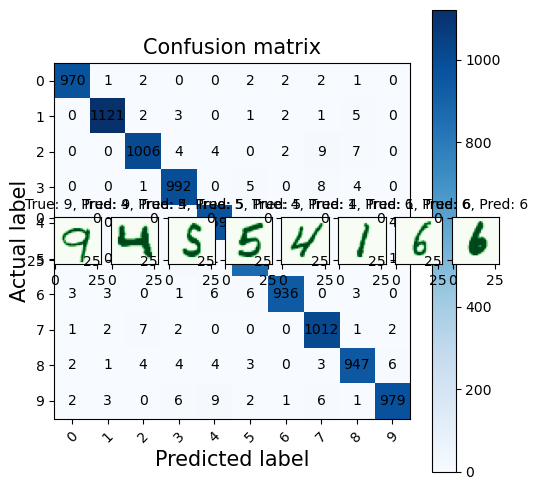

In [3]:
# Import required libraries
from tensorflow.keras.utils import to_categorical  # Using TensorFlow's Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# 1. Required Libraries
# Keras and TensorFlow are required for creating and training neural networks
# If not already installed, run:
# pip install keras tensorflow

# 2. Starter Functions for Plotting
# This function will reshape and plot an image from a pixel value array
def plot_image(num_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, num_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

# Function for displaying a confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center', verticalalignment='center')

# 3. Loading the Data
train_data = pd.read_csv('D:\\kommunen Jul\\december\\A5_mnist_train.csv')
test_data = pd.read_csv('D:\\kommunen Jul\\december\\A5_mnist_test.csv')

# Check the first few rows of the training data
print(train_data.head())

# 4. Split data into features (X) and labels (y)
X_train = train_data.iloc[:, 1:].values  # All rows, all columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # All rows, just the first column (labels)

X_test = test_data.iloc[:, 1:].values    # Same for the test data
y_test = test_data.iloc[:, 0].values

# 5. Preprocess Data
# Normalize data (scale to [0, 1] by dividing by 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 6. One-hot encode the labels (turn labels into a 10-class one-hot array)
y_train_one_hot = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test_one_hot = to_categorical(y_test, 10)

# 7. Create the Neural Network Model (MLP)
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout to avoid overfitting

# Add second hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# 8. Compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# 9. Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=128, validation_data=(X_test, y_test_one_hot))

# 10. Evaluate the model
# Test accuracy
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

# 11. Make predictions
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# 12. Classification report and accuracy score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

# 13. Confusion matrix
create_confusion_matrix(y_true, y_pred_classes, 10)

# 14. Visualize some random predictions
for _ in range(8):  # Display 8 random predictions
    random_index = random.randint(0, X_test.shape[0] - 1)
    true_label = y_true[random_index]
    pred_label = y_pred_classes[random_index]
    
    # Plot the image
    plot_image(8, _ + 1, X_test[random_index, :], 28, 
               f'True: {true_label}, Pred: {pred_label}', 
               colors="Greens" if true_label == pred_label else "Reds")

plt.show()


Another thing we have to do to prepare our data is to scale the features using `StandardScaler()`. Do just as in **Assignment 5** to scale `X_train` and `X_test` and save both of them to a new variable (you can name them `X_train_scaled` and `X_test_scaled`).

   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3606 - accuracy: 0.8967 - val_loss: 0.1717 - val_accuracy: 0.9521
Epoch 2/10
469/469 [==============================] -

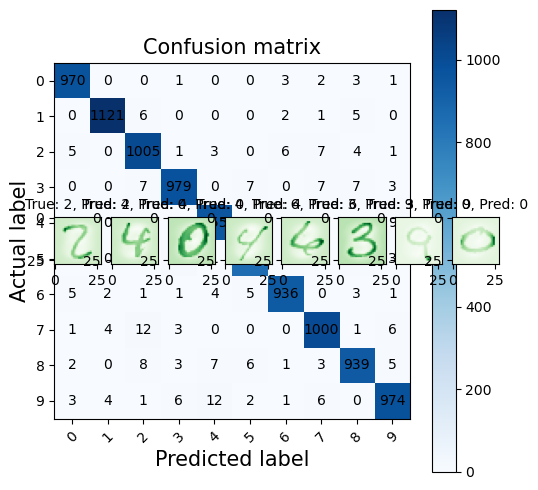

In [4]:
# Import required libraries
from tensorflow.keras.utils import to_categorical  # Using TensorFlow's Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import warnings
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# 1. Required Libraries
# Keras and TensorFlow are required for creating and training neural networks
# If not already installed, run:
# pip install keras tensorflow

# 2. Starter Functions for Plotting
# This function will reshape and plot an image from a pixel value array
def plot_image(num_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, num_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

# Function for displaying a confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center', verticalalignment='center')

# 3. Loading the Data
train_data = pd.read_csv('D:\\kommunen Jul\\december\\A5_mnist_train.csv')
test_data = pd.read_csv('D:\\kommunen Jul\\december\\A5_mnist_test.csv')

# Check the first few rows of the training data
print(train_data.head())

# 4. Split data into features (X) and labels (y)
X_train = train_data.iloc[:, 1:].values  # All rows, all columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # All rows, just the first column (labels)

X_test = test_data.iloc[:, 1:].values    # Same for the test data
y_test = test_data.iloc[:, 0].values

# 5. Preprocess Data
# Normalize data (scale to [0, 1] by dividing by 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 6. Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# 7. One-hot encode the labels (turn labels into a 10-class one-hot array)
y_train_one_hot = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test_one_hot = to_categorical(y_test, 10)

# 8. Create the Neural Network Model (MLP)
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))  # Dropout to avoid overfitting

# Add second hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# 9. Compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# 10. Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=128, validation_data=(X_test_scaled, y_test_one_hot))

# 11. Evaluate the model
# Test accuracy
score = model.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

# 12. Make predictions
y_pred = model.predict(X_test_scaled)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# 13. Classification report and accuracy score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

# 14. Confusion matrix
create_confusion_matrix(y_true, y_pred_classes, 10)

# 15. Visualize some random predictions
for _ in range(8):  # Display 8 random predictions
    random_index = random.randint(0, X_test_scaled.shape[0] - 1)
    true_label = y_true[random_index]
    pred_label = y_pred_classes[random_index]
    
    # Plot the image
    plot_image(8, _ + 1, X_test_scaled[random_index, :], 28, 
               f'True: {true_label}, Pred: {pred_label}', 
               colors="Greens" if true_label == pred_label else "Reds")

plt.show()


### 6. Building our Neural Network

The following function builds the neural tetwork and returns it. See the comments for an explanation of each step.

In [ ]:
def neural_network():
    
    # Define our network structure, in this case we want a fully connected neural
    # network where we add layers sequentially. For this purpuse, using the Sequantial()
    # method is sutiable.
    model = Sequential()
    
    # Add the first layer to our model. Using Dense() will define this layer as a fully 
    # connected layer where all neurons in this layer are connected to all neurons in 
    # the previous layer. We chose to put 512 neurons in this layer, and set the
    # activation function `relu``. We also need to specify our input shape. Since our
    # images are 28x28 pixels, we set the input shape to 784.
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    
    # add a dropout layer, which is a way to randomly select neurons to ignore during
    # training. Using dropout is a way to try to reduce overfit. Here we set 20% of the
    # neurons to be ignored.
    model.add(Dropout(0.2))
    
    # add a "hidden layer" to our model, which is another fully connected layer. We set
    # the number of neurons to 512 and chose the same activation function ReLu. 
    model.add(Dense(512, activation='relu'))
    
    # add another dropput of 20% 
    model.add(Dropout(0.2))
    
    # Add the final layer, which is also going to be a fully connected `Dense` layer.
    # Since we have 10 classes (10 digits), we use 10 neurons in this layer. 
    # Since this is a multi class classification problem, the activation function 
    # `softmax` is a good choise for this purpuse. 
    model.add(Dense(10, activation='softmax'))
    return model

model = neural_network()
model.summary()

### 7. Model configuration

This code configures the compilation step of our model.

**Here's an explanation:**

- `loss='categorical_crossentropy'`: Loss function determines how the model measures the difference between the predicted outputs and the true outputs. In this case, 'categorical_crossentropy' is a loss function specifically designed for multi-class classification problems. It quantifies the dissimilarity between the predicted probability distribution and the true one-hot encoded labels. The model aims to minimize this loss during training.
- `optimizer=RMSprop()`: An optimizer is responsible for adjusting the model's parameters based on the computed gradients during training. RMSprop is one type of optimizer. It adapts the learning rate (how much the parameters are updated) based on the historical gradients. This allows the optimizer to automatically adjust the learning rate for each parameter individually, which can improve convergence and learning speed.
- `metrics=['accuracy']`: Metrics are used to evaluate the performance of the model. Accuracy is a commonly used metric for classification tasks. It measures the percentage of correctly predicted samples out of the total number of samples. For example, if the model predicts the correct class for 80 out of 100 samples, the accuracy would be 80%.

In [ ]:
model.compile(loss='categorical_crossentropy',
                 optimizer=RMSprop(),
                 metrics=['accuracy'])

### 8. Training the model

After compiling the model with the configurations above, we can proceed to train the model using the fit method, passing in the training data and labels. During training, the model will minimize the specified loss function using the chosen optimizer, while monitoring the accuracy metric.

Train your model by calling its `fit()`-function using the following parameters: 
- `x`: The scaled features from the training dataset
- `y`: The one-hot encoded labels from the training dataset
- `batch_size`: During training, the dataset is divided into smaller subsets called batches. The batch size determines the number of samples that will be propagated through the model at once. Set this to 32, which means that the model will process 32 samples at a time before updating the weights based on the computed gradients.
- `epochs`: An epoch refers to a complete pass through the entire dataset during training. In other words, it represents the number of times the model will iterate over the entire training dataset. Se this to 10 so that the training process will go through 10 epochs.
- `verbose`: Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Set this to 1 to display progress bars during training. 

All arguments and more information about the model can be found at [Keras Sequential fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)

In [5]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# 1. Load the Data
train_data = pd.read_csv('D:\\kommunen Jul\\december\\A5_mnist_train.csv')
test_data = pd.read_csv('D:\\kommunen Jul\\december\\A5_mnist_test.csv')

# 2. Split data into features (X) and labels (y)
X_train = train_data.iloc[:, 1:].values  # All rows, all columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # All rows, just the first column (labels)

X_test = test_data.iloc[:, 1:].values    # Same for the test data
y_test = test_data.iloc[:, 0].values

# 3. Preprocess Data
# Normalize data (scale to [0, 1] by dividing by 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 4. Scale the features using StandardScaler
scaler = StandardScaler()

# Reshaping X_train and X_test to 2D arrays for scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. One-hot encode labels
y_train = to_categorical(y_train, 10)  # 10 classes for MNIST
y_test = to_categorical(y_test, 10)

# 6. Define the neural network
def neural_network():
    model = Sequential()

    # Add the first layer: fully connected, 512 neurons, ReLU activation, input shape (784,)
    model.add(Dense(512, activation='relu', input_shape=(784,)))

    # Add dropout layer to reduce overfitting (20% dropout)
    model.add(Dropout(0.2))

    # Add another fully connected layer with 512 neurons and ReLU activation
    model.add(Dense(512, activation='relu'))

    # Add another dropout layer (20% dropout)
    model.add(Dropout(0.2))

    # Add the final output layer with 10 neurons (one for each class), using softmax activation
    model.add(Dense(10, activation='softmax'))
    
    return model

# Build the model
model = neural_network()

# Display the model summary
model.summary()

# 7. Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# 8. Train the model
model.fit(X_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,   # Display progress bar during training
          validation_data=(X_test, y_test))   # Use test data for validation during training

# Optionally, evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==========================

### 9. Making predictions

Use the models `predict()`-function ([More information here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)) to make predictions. Remember to pass in the scaled test features to the function and save the result in a variable so that you can evaluate your model.

The `predict()`-funciton of the model we are using will return a one-hot encoded array of arrays where the values `[0, 1, 2]` will be represented as this array of arrays:

```python
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
```

To convert the one-hot encoded array to a regular array of labels we can use `np.argmax()` to retrieve the index of the maximum value along the specified axis. Since the one-hot encoding represents the categories as binary vectors with a single 1 (hot) and the rest as 0 (cold), `np.argmax()` will return the index of the 1 for each sample, effectively converting it back to a one-dimensional array of labels.

Reda more about the `np.argmax()`-function here: [Numpy argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

In [6]:
# Import necessary libraries
import numpy as np

# 9. Making Predictions

# Use the model's predict function to get the predicted labels
# This returns a one-hot encoded array of arrays.
y_pred_nn_one_hot = model.predict(X_test)

# Convert the one-hot encoded predictions to regular labels using np.argmax()
# This will return the index of the maximum value in each one-hot vector
y_pred_nn = np.argmax(y_pred_nn_one_hot, axis=1)

# Print the first 10 predictions to verify
print("Predicted labels (first 10):", y_pred_nn[:10])

# You can also compare with the true labels
print("True labels (first 10):", np.argmax(y_test, axis=1)[:10])


313/313 [==============================] - 1s 2ms/step
Predicted labels (first 10): [2 1 0 4 1 4 9 5 9 0]
True labels (first 10): [2 1 0 4 1 4 9 5 9 0]


### 10. Evaluating and visualizing

Just as in **Assignment 5**:
- Use the `accuracy_score()`-function to find out the accuracy of your model
- Use `plot_image()` within a loop to show a random selection of the images. Remember to get the correct label and predicted label and set the colormap to red or green based on if the prediction was correct or not.
- Use `create_confusion_matrix()` to display which numbers your model had a harder time predicting-

Accuracy: 96.96%


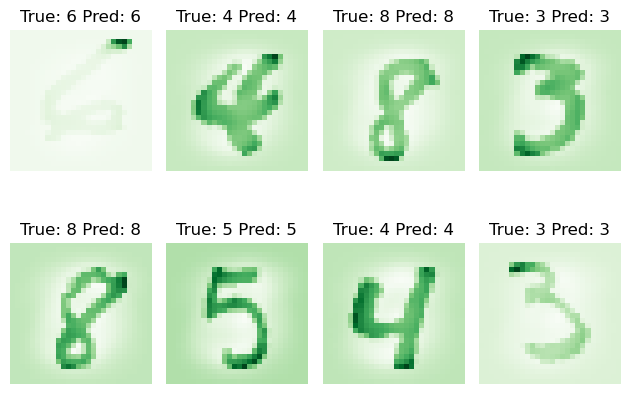

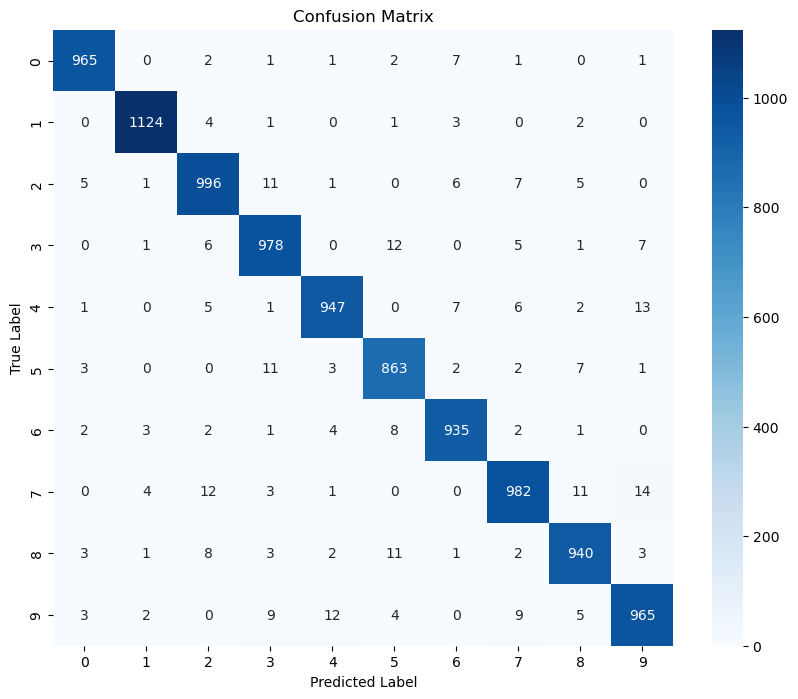

In [8]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# 10. Evaluating and Visualizing

# Calculate the accuracy of the model
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_nn)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Number of random images to plot
n_plots = 8
pixel_height_width = 28

# Loop to plot random images with true and predicted labels
for i in range(n_plots):
    random_index = random.randint(0, X_test.shape[0] - 1)
    current_image = X_test[random_index, :].reshape(pixel_height_width, pixel_height_width)  # Reshape to 28x28
    actual = np.argmax(y_test[random_index])  # Get the actual label from one-hot encoded vector
    predicted = y_pred_nn[random_index]  # Get the predicted label
    colors = "Greens" if (actual == predicted) else "Reds"  # Set the colormap to green if correct, red if incorrect
    image_title = f"True: {actual} Pred: {predicted}"

    # Plot the image with the title and colormap
    plt.subplot(2, 4, i + 1)
    plt.imshow(current_image, cmap=colors)
    plt.title(image_title)
    plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

# Generate and display the confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Create confusion matrix
create_confusion_matrix(np.argmax(y_test, axis=1), y_pred_nn, 10)


## Part 2 - Another dataset: MNIST fashion

Try yourself with another dataset "fashion mnist", where the images contain clothes intead of digits. It can be downloaded here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

Since the shapes are more complicated to predict than hand digits, you might need to tune your models a bit more this time, and also increase the training time such as number of epochs.

Since this is the last part of the last assignment you'll get very little guidance in here.

### 1. Load the data

Download the dataset from the link above and load it in the same way as before.

In [10]:
import pandas as pd

# Load the training and test datasets from the correct file paths
df_train = pd.read_csv('D:/kommunen Jul/december/A5_fashion-mnist_train.csv')
df_test = pd.read_csv('D:/kommunen Jul/december/A5_fashion-mnist_test.csv')

# Display the last few rows of the training data to verify
df_train.tail()


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[5 rows x 785 columns]

### 2. Explore the data

Since this is new, unknown data, I suggest that you explore it using the techniques we have used in previous assignments.

In [11]:
import pandas as pd
import numpy as np

# Load the training and test datasets from the correct file paths
df_train = pd.read_csv('D:/kommunen Jul/december/A5_fashion-mnist_train.csv')
df_test = pd.read_csv('D:/kommunen Jul/december/A5_fashion-mnist_test.csv')

# Print information about the training dataset
print(df_train.info(), end='\n\n')

# Get unique labels in the training dataset and sort them
unique_labels = df_train['label'].unique()
sorted_labels = np.sort(unique_labels)
print("Unique Labels:", sorted_labels)

# Display summary statistics of the 'label' column in the training dataset
label_summary = df_train['label'].describe()
print("\nLabel Summary:\n", label_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None

Unique Labels: [0 1 2 3 4 5 6 7 8 9]

Label Summary:
 count    60000.000000
mean         4.500000
std          2.872305
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64


### 3. Preparing the data

Just as before, do the following to prepare your data:
- Split the data into features and labels for both the training data and test data.
- Convert the labels of both the training dataset and the testing dataset to a one-hot encoded array.
- Scale the features of the training and testing dataset.

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load the training and test datasets
df_train = pd.read_csv('D:/kommunen Jul/december/A5_fashion-mnist_train.csv')
df_test = pd.read_csv('D:/kommunen Jul/december/A5_fashion-mnist_test.csv')

# Split data into features and labels
X_train = np.array(df_train.iloc[:, 1:])  # Features (all columns except the first one)
y_train = np.array(df_train.iloc[:, 0])   # Labels (first column)
X_test = np.array(df_test.iloc[:, 1:])    # Features (all columns except the first one)
y_test = np.array(df_test.iloc[:, 0])     # Labels (first column)

# Convert labels to one-hot encoded arrays
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on the training data
X_train_scaled = scaler.transform(X_train)  # Apply scaling to the training data
X_test_scaled = scaler.transform(X_test)    # Apply scaling to the test data

# Display shapes of processed data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


X_train_scaled shape: (60000, 784)
X_test_scaled shape: (10000, 784)
y_train_one_hot shape: (60000, 10)
y_test_one_hot shape: (10000, 10)


Now you can use a loop to display a few random samples from the dataset and get a feel for what type of images it cointains

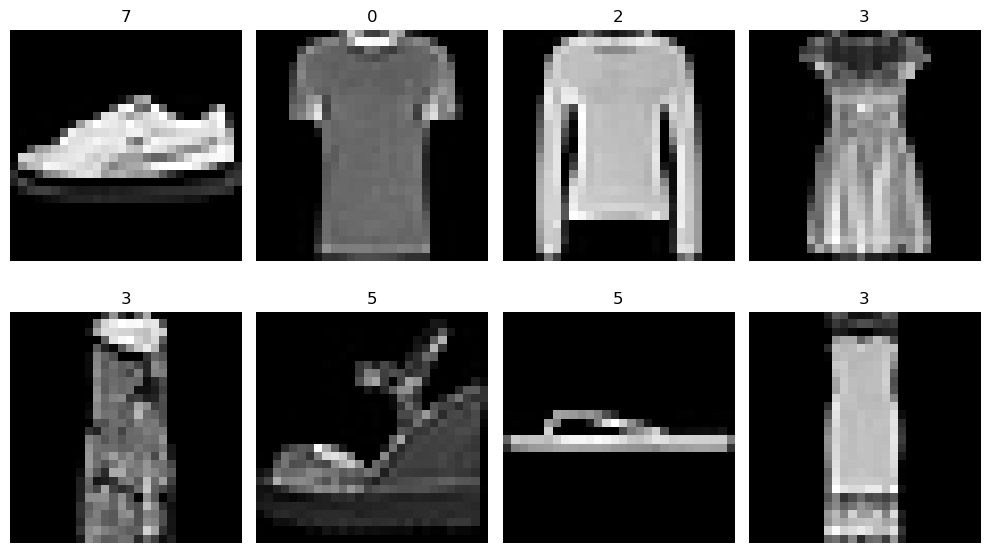

In [13]:
import random
import matplotlib.pyplot as plt

# Number of images to plot
n_plots = 8
pixel_height_width = 28  # Each image is 28x28 pixels

# Function to plot the images
def plot_image(n_plots, plot_index, image_data, pixel_height_width, title):
    image_reshaped = image_data.reshape(pixel_height_width, pixel_height_width)
    plt.subplot(2, 4, plot_index)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Plot random samples from the test dataset
plt.figure(figsize=(10, 6))
for i in range(n_plots):
    random_index = random.randint(0, X_test.shape[0] - 1)
    current_image = X_test[random_index, :]
    label = y_test[random_index]
    image_title = f"{label}"
    plot_image(n_plots, i + 1, current_image, pixel_height_width, image_title)

plt.tight_layout()
plt.show()


### 4. Preparing the model

Create a new instance of a neural network by using the `neural_network()`-function from earlier and compile it like before.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

# Function to create a neural network model
def neural_network():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input images (28x28) into a 1D array
        Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
        Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes) and softmax activation
    ])
    return model

# Create the model
model = neural_network()

# Display the model summary
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 5. Training and making predictions

Train the model and make predictions on the testing dataset by using the scaled features you just created.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] - 6s 2ms/step - loss: 2.0997 - accuracy: 0.5721
Epoch 2/3
1875/1875 [==========================

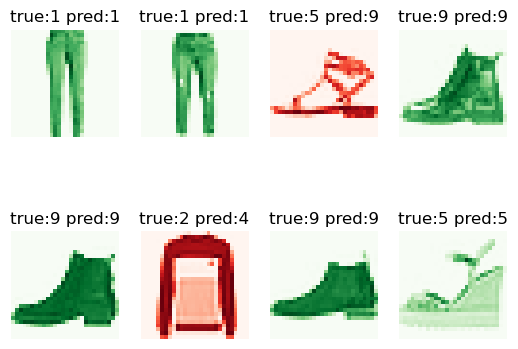

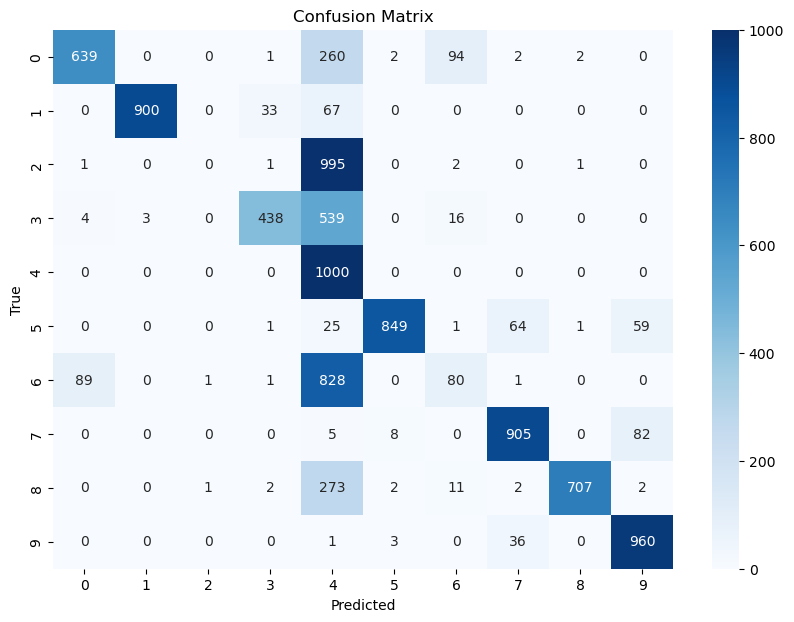

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

# Load the dataset
df_train = pd.read_csv("D:/kommunen Jul/december/A5_fashion-mnist_train.csv")
df_test = pd.read_csv("D:/kommunen Jul/december/A5_fashion-mnist_test.csv")

# Explore the dataset
print(df_train.info(), end='\n\n')

# Split data into features and labels
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])
X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test.iloc[:, 0])

# Convert labels to one-hot encoded
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Flatten the data to 1D (from 28x28 to 784)
X_train_flattened = X_train.reshape(-1, 28 * 28)
X_test_flattened = X_test.reshape(-1, 28 * 28)

# Define the neural network model
def neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Flattened input
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model = neural_network()
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train_flattened,  # Flattened training data
    y_train_one_hot,  # One-hot encoded labels for training data
    batch_size=32,
    epochs=3,
    verbose=1
)

# Make predictions on the flattened test data
y_pred_nn_one_hot = model.predict(X_test_flattened)
y_pred_nn = np.argmax(y_pred_nn_one_hot, axis=1)

print('Predictions complete')

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Function to plot the image
def plot_image(n_plots, index, image, height_width, title, colors='Blues'):
    plt.subplot(2, 4, index)
    plt.imshow(image.reshape(height_width, height_width), cmap=colors)
    plt.title(title)
    plt.axis('off')

# Display a few random samples from the test dataset
n_plots = 8
pixel_height_width = 28
for i in range(n_plots):
    random_index = random.randint(0, X_test.shape[0])
    current_image = X_test[random_index,:]
    actual = y_test[random_index]
    predicted = y_pred_nn[random_index]
    colors = "Greens" if (actual == predicted) else "Reds"
    image_title = f"true:{actual} pred:{predicted}"
    plot_image(n_plots, i+1, current_image, pixel_height_width, image_title, colors)

plt.show()

# Create confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

create_confusion_matrix(y_test, y_pred_nn, 10)


### 6. Results

Finally you can compare the predictions to the correct labels and print the accuracy and a few random red/green sample images based on the predictions.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5445 - accuracy: 0.7232
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6586 - accuracy: 0.8013
Epoch 3/3
313/313 [==============================] - 1s 1ms/step
Accuracy: 82.68%


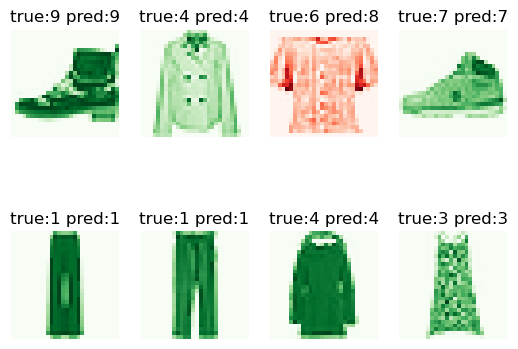

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

# Load the dataset
df_train = pd.read_csv("D:/kommunen Jul/december/A5_fashion-mnist_train.csv")
df_test = pd.read_csv("D:/kommunen Jul/december/A5_fashion-mnist_test.csv")

# Split data into features and labels
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])
X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test.iloc[:, 0])

# Convert labels to one-hot encoded
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Flatten the data to 1D (from 28x28 to 784)
X_train_flattened = X_train.reshape(-1, 28 * 28)
X_test_flattened = X_test.reshape(-1, 28 * 28)

# Define the neural network model
def neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Flattened input
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model = neural_network()
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train_flattened,  # Flattened training data
    y_train_one_hot,  # One-hot encoded labels for training data
    batch_size=32,
    epochs=3,
    verbose=1
)

# Make predictions on the flattened test data
y_pred_nn_one_hot = model.predict(X_test_flattened)
y_pred_nn = np.argmax(y_pred_nn_one_hot, axis=1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Function to plot the image
def plot_image(n_plots, index, image, height_width, title, colors='Blues'):
    plt.subplot(2, 4, index)
    plt.imshow(image.reshape(height_width, height_width), cmap=colors)
    plt.title(title)
    plt.axis('off')

# Display a few random samples from the test dataset
n_plots = 8
pixel_height_width = 28
for i in range(n_plots):
    random_index = random.randint(0, X_test.shape[0])
    current_image = X_test[random_index,:]
    actual = y_test[random_index]
    predicted = y_pred_nn[random_index]
    colors = "Greens" if (actual == predicted) else "Reds"
    image_title = f"true:{actual} pred:{predicted}"
    plot_image(n_plots, i+1, current_image, pixel_height_width, image_title, colors)

plt.show()


You can, one last time, display the confusion matrix for your results by using the same function as before.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.7753 - accuracy: 0.7173
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6794 - accuracy: 0.7958
Epoch 3/3
313/313 [==============================] - 1s 1ms/step
Accuracy: 80.97%


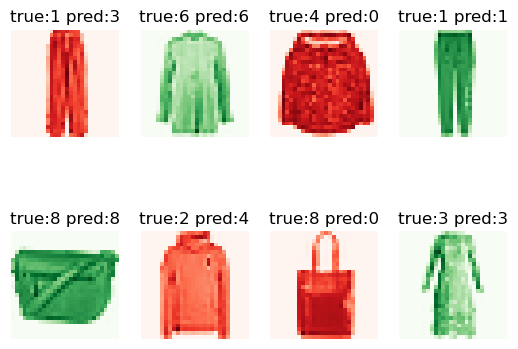

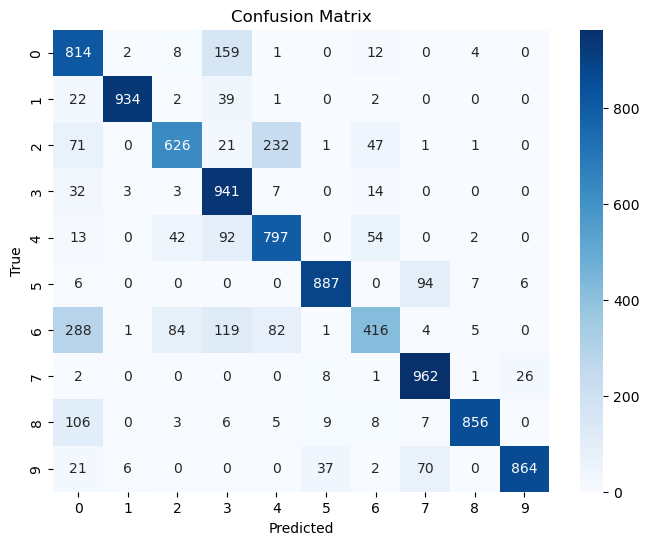

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_train = pd.read_csv("D:/kommunen Jul/december/A5_fashion-mnist_train.csv")
df_test = pd.read_csv("D:/kommunen Jul/december/A5_fashion-mnist_test.csv")

# Split data into features and labels
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])
X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test.iloc[:, 0])

# Convert labels to one-hot encoded
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Flatten the data to 1D (from 28x28 to 784)
X_train_flattened = X_train.reshape(-1, 28 * 28)
X_test_flattened = X_test.reshape(-1, 28 * 28)

# Define the neural network model
def neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Flattened input
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model = neural_network()
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train_flattened,  # Flattened training data
    y_train_one_hot,  # One-hot encoded labels for training data
    batch_size=32,
    epochs=3,
    verbose=1
)

# Make predictions on the flattened test data
y_pred_nn_one_hot = model.predict(X_test_flattened)
y_pred_nn = np.argmax(y_pred_nn_one_hot, axis=1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Function to plot the image
def plot_image(n_plots, index, image, height_width, title, colors='Blues'):
    plt.subplot(2, 4, index)
    plt.imshow(image.reshape(height_width, height_width), cmap=colors)
    plt.title(title)
    plt.axis('off')

# Display a few random samples from the test dataset
n_plots = 8
pixel_height_width = 28
for i in range(n_plots):
    random_index = random.randint(0, X_test.shape[0])
    current_image = X_test[random_index,:]
    actual = y_test[random_index]
    predicted = y_pred_nn[random_index]
    colors = "Greens" if (actual == predicted) else "Reds"
    image_title = f"true:{actual} pred:{predicted}"
    plot_image(n_plots, i+1, current_image, pixel_height_width, image_title, colors)

plt.show()

# Confusion Matrix function
def create_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Display the confusion matrix
create_confusion_matrix(y_test, y_pred_nn, 10)


# Done!

Great job this far! I you completed the tasks above you are more than done with this course. YOu don't have to submit the bonus assignments on to the teacher on ItsLearning but I recommend you to push the notebook to GitHub for later reference.

**Thank you again for attending this course and good luck with your future Programming and Machine Learning**